<a href="https://colab.research.google.com/github/gullyboy007/machine-learning-journey/blob/master/predict_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Description: This program uses the dual moving average crossover to determine when to buy and sell stock.

from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
#Load the data 
from google.colab import files # Use to load data on Google Colab 
uploaded = files.upload() # Use to load data on Google Colab

Saving AAPL.csv to AAPL.csv


In [4]:
#Store the data into the df variable
AAPL = pd.read_csv('AAPL.csv')
#Show the dataframe
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-13,194.699997,196.789993,193.600006,194.149994,191.860229,21674600
1,2019-06-14,191.550003,193.589996,190.300003,192.740005,190.466873,18761500
2,2019-06-17,192.899994,194.960007,192.169998,193.889999,191.603317,14669100
3,2019-06-18,196.050003,200.289993,195.210007,198.449997,196.109528,26551000
4,2019-06-19,199.679993,199.880005,197.309998,197.869995,195.536377,21124200
...,...,...,...,...,...,...,...
248,2020-06-08,330.250000,333.600006,327.320007,333.459991,333.459991,23913600
249,2020-06-09,332.140015,345.609985,332.010010,343.989990,343.989990,36928100
250,2020-06-10,347.899994,354.769989,346.089996,352.839996,352.839996,41662900
251,2020-06-11,349.309998,351.059998,335.480011,335.899994,335.899994,50415600


In [6]:
df = pd.DataFrame()
df['AAPL'] = AAPL['Adj Close'].values
df

,AAPL
0,191.860229
1,190.466873
2,191.603317
3,196.109528
4,195.536377
...,...
248,333.459991
249,343.989990
250,352.839996
251,335.899994


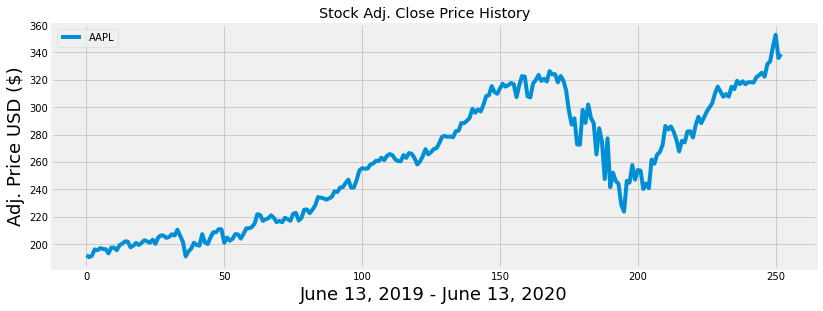

In [8]:
# Visually Show The Stock/Portfolio Price(s)
# Create the title 
title = 'Stock Adj. Close Price History    '
#Get the stocks
my_stocks = df
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
  
plt.title(title)
plt.xlabel('June 13, 2019 - June 13, 2020',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [9]:
#Create the 30 day simple moving average
SMA30 = df.rolling(window=30).mean()
SMA30

,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
248,309.782894
249,311.835709
250,314.336111
251,315.967670


In [10]:
#Create the 100 day simple moving average
SMA100 = df.rolling(window=100).mean()
SMA100

,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
248,292.935496
249,293.277753
250,293.669707
251,293.857538


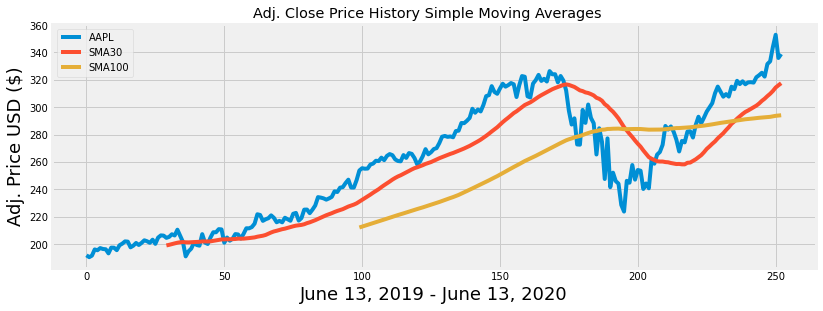

In [12]:
# Visually Show The Stock and The Moving Averages
# Create the title 
title = 'Adj. Close Price History Simple Moving Averages   '
#Get the stocks
my_stocks = df
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( my_stocks['AAPL'],  label='AAPL')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.plot( SMA30['AAPL'],  label='SMA30')
plt.plot( SMA100['AAPL'],  label='SMA100')
  
plt.title(title)
plt.xlabel('June 13, 2019 - June 13, 2020',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()

In [0]:
#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(0,len(signal)):
    #if sma30 > sma100  then buy else sell
      if signal['SMA30'][i] > signal['SMA100'][i]:
        if flag != 1:
          sigPriceBuy.append(signal['AAPL'][i])
          sigPriceSell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
        #print('Buy')
      elif signal['SMA30'][i] < signal['SMA100'][i]:
        if flag != 0:
          sigPriceSell.append(signal['AAPL'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
        #print('sell')
      else: #Handling nan values
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [0]:
#Create a new dataframe
signal = pd.DataFrame(index=df['AAPL'].index)
signal['AAPL'] = df['AAPL']
signal['SMA30'] = SMA30['AAPL']
signal['SMA100'] = SMA100['AAPL']

In [15]:
signal

,AAPL,SMA30,SMA100
0,191.860229,NaN,NaN
1,190.466873,NaN,NaN
2,191.603317,NaN,NaN
3,196.109528,NaN,NaN
4,195.536377,NaN,NaN
...,...,...,...
248,333.459991,309.782894,292.935496
249,343.989990,311.835709,293.277753
250,352.839996,314.336111,293.669707
251,335.899994,315.967670,293.857538


In [0]:
x = buy_sell(signal)
signal['Buy_Signal_Price'] = x[0]
signal['Sell_Signal_Price'] = x[1]

In [17]:
signal

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,191.860229,NaN,NaN,NaN,NaN
1,190.466873,NaN,NaN,NaN,NaN
2,191.603317,NaN,NaN,NaN,NaN
3,196.109528,NaN,NaN,NaN,NaN
4,195.536377,NaN,NaN,NaN,NaN
...,...,...,...,...,...
248,333.459991,309.782894,292.935496,NaN,NaN
249,343.989990,311.835709,293.277753,NaN,NaN
250,352.839996,314.336111,293.669707,NaN,NaN
251,335.899994,315.967670,293.857538,NaN,NaN


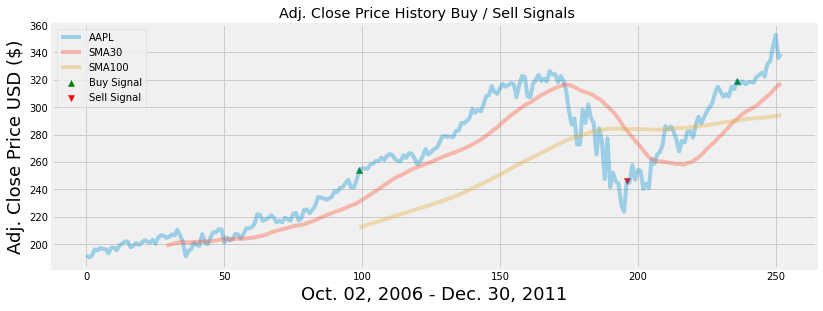

In [18]:
# Visually Show The Stock buy and sell signals
# Create the title 
title = 'Adj. Close Price History Buy / Sell Signals   '
#Get the stocks
my_stocks = signal
ticker = 'AAPL'
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(my_stocks.index, my_stocks['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( my_stocks[ticker],  label=ticker, alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.plot( my_stocks['SMA30'],  label='SMA30', alpha = 0.35)
plt.plot( my_stocks['SMA100'],  label='SMA100', alpha = 0.35)
plt.title(title)
plt.xlabel('Oct. 02, 2006 - Dec. 30, 2011',fontsize=18)
plt.ylabel('Adj. Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()